## Indian Premier League


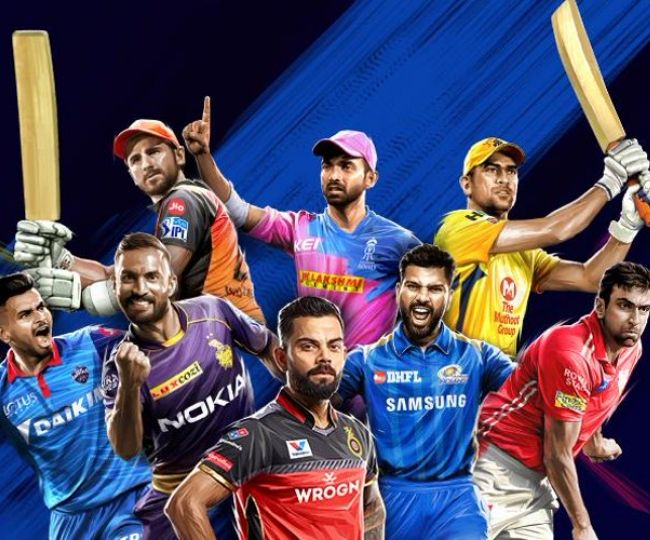


India is a country that doesn’t just enjoys the game of cricket, but loves it. Hence, it’s no wonder that people are buzzing with excitement since Indian Premier League (IPL) 2020 started. 

The much-awaited thirteenth edition of the Indian Premier League (IPL) commenced in the United Arab Emirates (UAE) with defending champions Mumbai Indians taking on last year's finalist Chennai Super Kings (CSK) in a blockbuster tournament opener in Abu Dhabi on September 19.

There are many who are also taking to social media sites, especially Twitter, to express how eagerly they waited for the tournament.

In fact, the hashtag #IPL2020 is also trending on Twitter, there are several who are sharing posts using it.

In [ ]:
#Libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csk = pd.read_csv('../input/ipl-2020-players-dataset/IPL 2020 - CSK.csv')
rr = pd.read_csv('../input/ipl-2020-players-dataset/IPL 2020 - RR.csv')
rcb = pd.read_csv('../input/ipl-2020-players-dataset/IPL 2020 - RCB.csv')
mi = pd.read_csv('../input/ipl-2020-players-dataset/IPL 2020 - MI.csv')
kxip = pd.read_csv('../input/ipl-2020-players-dataset/IPL 2020 - KXIP.csv')
kkr = pd.read_csv('../input/ipl-2020-players-dataset/IPL 2020 - KKR.csv')
dc = pd.read_csv('../input/ipl-2020-players-dataset/IPL 2020 - DC.csv')
srh = pd.read_csv('../input/ipl-2020-players-dataset/IPL 2020 - SRH.csv')
rcb.head(3)

In [ ]:
data = pd.concat([csk,rr,rcb,mi,kxip,kkr,dc,srh], ignore_index=True)
data.sample(5)

In [ ]:
data.sample(15)

### Data Exploration

In [ ]:
#shape of dataframe
data.shape

We have 186 players, where each player have 25 attributes.

In [ ]:
data.Nationality.value_counts()

122 Indian Players, while 64 players are from different Nationalities.

In [ ]:
# For our analysis, let's remove the players with no previous data.
nostats = data['Matches'].isin(['No Past IPL Stats Found'])
data = data[~nostats]

In [ ]:
data.shape

We have the data available for 144 players, 42 new players will get a chance to debut in IPL 2020

In [ ]:
# data types
data.dtypes

We need to change the object types to numeric to do the proper analysis of the data.
Matches, Bat-Highest Score, Bat- Balls Faced, Bowl-Balls, Bowl-Runs Conceded should be int.
Bat-Average, Bat-Strike Rate, Bowl- Average, Bowl-Economy, Bowl-Strike Rate should be all float.

In [ ]:
def clean_runs(x):
    if isinstance(x,str):
        return (x.replace('*',''))
    return (x)
def clean_balls(x):
    if isinstance(x,str):
        return (x.replace(',',''))
    return (x)
def replace_dash(x):
    if isinstance(x,str):
        return (x.replace('-','0'))
    return (x)

Cleaning data// https://pbpython.com/currency-cleanup.html

In [ ]:
data['Matches'] = data.Matches.astype(int)
data['Bat-Highest Score'] = data['Bat-Highest Score'].apply(clean_runs).astype(int)
data['Bat- Balls Faced'] = data['Bat- Balls Faced'].apply(clean_balls).astype(int)
data['Bat- Average'] = data['Bat- Average'].apply(replace_dash).astype(float)
data['Bat-Strike Rate'] = data['Bat-Strike Rate'].apply(replace_dash).astype(float)
data['Bowl-Balls'] = data['Bowl-Balls'].apply(clean_balls).astype(int)
data['Bowl-Runs Conceded'] = data['Bowl-Runs Conceded'].apply(clean_balls).astype(int)
data['Bowl-Average'] = data['Bowl-Average'].apply(replace_dash).astype(float).round(2)
data['Bowl-Economy'] = data['Bowl-Economy'].apply(replace_dash).astype(float).round(2)
data['Bowl-Strike Rate'] = data['Bowl-Strike Rate'].apply(replace_dash).astype(float).round(2)

In [ ]:
data.dtypes

Now we have the data in cleaned form and correct data types.

### Best Players overall


In [ ]:
def Most_runs_over():
    print('Players who scored the most runs: ') 
    return data[['Name','Team','Matches','Bat-Runs','Bat- Average']].sort_values(by='Bat-Runs',ascending=False).reset_index(drop=True).head(5)

def Best_average_over():
    print('Players with best batting average: ') 
    return data[['Name','Team','Matches','Bat-Runs','Bat- Average']].sort_values(by='Bat- Average',ascending=False).reset_index(drop=True).head(5)

def Best_strikerate_over():
    data_team = data[data['Bat-Runs'] >= 500]
    print('Players with best batting strike rate(scored 500 runs or more): ') 
    return data_team[['Name','Team','Matches','Bat-Runs','Bat-Strike Rate']].sort_values(by='Bat-Strike Rate',ascending=False).reset_index(drop=True).head(5)

def Most_Notouts_over():
    print('Players with most not outs:')
    return data[['Name','Team','Matches','Bat-Runs','Bat- Not Out']].sort_values(by='Bat- Not Out',ascending=False).reset_index(drop=True).head(5)

def Most_catches_over():
    print('Players with most catches:')
    return data[['Name','Team','Matches','Catches']].sort_values(by='Catches',ascending=False).reset_index(drop=True).head(5)

def Most_centuries_over():
    print('Players with most centuries:')
    return data[['Name','Team','Matches','Bat-Runs','100']].sort_values(by='100',ascending=False).reset_index(drop=True).head(5)

def Most_6s():
    print('Players with most 6s:')
    return data[['Name','Team','Matches','Bat-Runs','6s']].sort_values(by='6s',ascending=False).reset_index(drop=True).head(5)

def Most_4s():
    print('Players with most 4s:')
    return data[['Name','Team','Matches','Bat-Runs','4s']].sort_values(by='4s',ascending=False).reset_index(drop=True).head(5)

def Most_wickets_over():
    print('Players with most wickets:')
    return data[['Name','Team','Matches','Bowl-Wickets','Bowl-Best Figures']].sort_values(by='Bowl-Wickets',ascending=False).reset_index(drop=True).head(5)

def Best_bowl_economy_over():
    data_team = data[data['Bowl-Wickets'] >= 10]
    print('Players with best bowling economy(10 wickets and above):')
    return data_team[['Name','Team','Matches','Bowl-Wickets','Bowl-Economy']].sort_values(by='Bowl-Economy').reset_index(drop=True).head(5)

def Best_bowl_average_over():
    data_team = data[data['Bowl-Wickets'] >= 10]
    print('Players with best bowling average(10 wickets and above):')
    return data_team[['Name','Team','Matches','Bowl-Wickets','Bowl-Average']].sort_values(by='Bowl-Average').reset_index(drop=True).head(5)

def four_wickets_over():
    print('Players with 4 wicket hauls:')
    return data[['Name','Team','Matches','Bowl-Wickets','Bowl-Best Figures','4W','5W']].sort_values(by='4W',ascending=False).reset_index(drop=True).head(5)


In [ ]:
Most_runs_over()

In [ ]:
Best_average_over()

In [ ]:
Best_strikerate_over()

In [ ]:
Most_Notouts_over()

In [ ]:
Most_catches_over()

In [ ]:
Most_centuries_over()

In [ ]:
Most_6s()

In [ ]:
Most_4s()

In [ ]:
Most_wickets_over()

Best_bowl_economy_over()

In [ ]:
Best_bowl_average_over()

In [ ]:
four_wickets_over()

### Best Players in the Team

In [ ]:
def Most_runs(x):
    data_team = data[data.Team == x]
    print('Players with most runs in ',x) 
    return data_team[['Name','Matches','Bat-Runs','Bat- Average']].sort_values(by='Bat-Runs',ascending=False).reset_index(drop=True).head(3)

def Best_strikerate(x):
    data_team = data[data.Team == x]
    data_team = data_team[data_team['Bat-Runs'] >= 1000]
    print('Players with best strike rate(1000 runs and above)in ',x) 
    return data_team[['Name','Matches','Bat-Runs','Bat-Strike Rate']].sort_values(by='Bat-Strike Rate',ascending=False).reset_index(drop=True).head(3)

def Most_Notouts(x):
    data_team = data[data.Team == x]
    print('Players with most not outs in', x)
    return data_team[['Name','Matches','Bat-Runs','Bat- Not Out']].sort_values(by='Bat- Not Out',ascending=False).reset_index(drop=True).head(3)

def Most_catches(x):
    data_team = data[data.Team == x]
    print('Players with most catches in', x)
    return data_team[['Name','Matches','Catches']].sort_values(by='Catches',ascending=False).reset_index(drop=True).head(3)

def Most_centuries(x):
    data_team = data[data.Team == x]
    print('Players with most centuries in', x)
    return data_team[['Name','Matches','Bat-Runs','100']].sort_values(by='100',ascending=False).reset_index(drop=True).head(2)

def Most_wickets(x):
    data_team = data[data.Team == x]
    print('Players with most wickets in', x)
    return data_team[['Name','Matches','Bowl-Wickets','Bowl-Best Figures']].sort_values(by='Bowl-Wickets',ascending=False).reset_index(drop=True).head(3)

def Best_bowl_economy(x):
    data_team = data[data.Team == x]
    data_team = data_team[data_team['Bowl-Wickets'] >= 10]
    print('Players with Best bowling economy(10 wickets and above) in', x)
    return data_team[['Name','Matches','Bowl-Wickets','Bowl-Economy']].sort_values(by='Bowl-Economy').reset_index(drop=True).head(3)

def Best_bowl_average(x):
    data_team = data[data.Team == x]
    data_team = data_team[data_team['Bowl-Wickets'] >= 10]
    print('Players with Best bowling average(10 wickets and above) in', x)
    return data_team[['Name','Matches','Bowl-Wickets','Bowl-Average']].sort_values(by='Bowl-Average').reset_index(drop=True).head(3)

def four_wickets(x):
    data_team = data[data.Team == x]
    data_team = data_team[data_team['Bowl-Wickets'] >= 10]
    print('Players with most 4 wicket hauls in', x)
    return data_team[['Name','Matches','Bowl-Wickets','Bowl-Best Figures','4W','5W']].sort_values(by='4W',ascending=False).reset_index(drop=True).head(3)


In [ ]:
Most_runs('RCB')

In [ ]:
Best_strikerate('KXIP')

In [ ]:
Most_Notouts('CSK')

In [ ]:
Most_centuries('KXIP')

In [ ]:
Most_catches('DC')

In [ ]:
Most_wickets('RR')

In [ ]:
Best_bowl_economy('SRH')

In [ ]:
Best_bowl_average('KKR')

In [ ]:
four_wickets('DC')

### DATA VISUALIZATION

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Team', hue='Nationality', data=data)
plt.title('Different Nationalities of Players in each team')

All the teams have 10 and above Indian players.

In [ ]:
plt.figure(figsize=(10,7))
#data['Runs500'] = data[data['Bat-Runs'] >= 500]
sns.stripplot(x='Team', y='Bat-Runs', data=data,linewidth=1)
plt.title('Runs of players in each team')

All the teams have experienced as well as unexperienced players. The players with runs below 500 might be bowlers and new All rounders. Players with runs around 1000-1500 might be All rounders and new batsman, players with runs above 1500 will consist of mostly Batsman.

In [ ]:
dummies = pd.get_dummies(data['Nationality']).rename(columns=lambda x: 'Nationality_' + str(x))
df = pd.concat([data, dummies], axis=1)
df.drop(['Nationality'], inplace=True, axis=1)
df.dropna(inplace=True)
df.sample(5) #Created dummies for nationality 

In [ ]:
plt.figure(figsize=(6,5))
sns.set()
ax = sns.countplot('Nationality_Indian', data=df,palette='bone')
ax.set_xlabel(xlabel = 'Nationality Indian', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Nationality of Players', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.set()
data_team = df[df['Bat-Runs'] >= 500]
ax = sns.violinplot(x='Team', y='Bat-Runs', hue='Nationality_Indian', data=data_team, palette='Set3',cut=0)
ax.set_xlabel('Teams', fontsize=14)
ax.set_ylabel('Runs scored', fontsize=14)
ax.set_title(label = 'Violin plot of Runs scored by players(500 runs and above)',fontsize=14)
plt.show()

We can see the runs scored by Indians and foreign players in each team.

In [ ]:
plt.figure(figsize=(10,7))
sns.set()
data_team = df[df['Bat-Runs'] >= 500]
ax = sns.boxplot(x='Team', y='Bat-Strike Rate', hue='Nationality_Indian', data=data_team,palette='Set3')
ax.set_xlabel('Teams', fontsize=14)
ax.set_ylabel('Batting Strike Rate', fontsize=14)
ax.set_title(label = 'Distribution of Strike Rate of players(500 runs and above)',fontsize=14)
plt.show()

The Strike rate of foreign players is more than Indian players on average, as we can see from the above distribution.
This can also be interpreted as, foreign players with more strike rates is selected on purpose by Teams, so they can be of more value in this fast format of cricket.

In [ ]:
plt.figure(figsize=(10,7))
sns.set()
data_team = df[df['Bat-Runs'] >= 1000]
ax = sns.boxplot(y="Bat- Average", x="Team", hue='Nationality_Indian', data=data_team,palette='Set3')
ax.set_xlabel('Teams', fontsize=14)
ax.set_ylabel('Batting Average', fontsize=14)
ax.set_title(label = 'Distribution of Average Runs by players(1000 runs and above)',fontsize=14)
plt.show()

In [ ]:
sns.set(style ="dark", palette="Set3")
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
data_team = df[df['50'] >= 1]
ax = sns.distplot(data_team['50'],bins=10,kde=False)
ax.set_xlabel(xlabel = 'Number of Half-centuries', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Number of Half-centuries by players(1 and above)', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
data_team = df[df['Bowl-Wickets'] >= 10]
ax = sns.violinplot(x='Team', y='Bowl-Wickets', hue='Nationality_Indian', data=data_team,cut=0)
ax.set_xlabel('Teams', fontsize=14)
ax.set_ylabel('Wickets Taken', fontsize=14)
ax.set_title(label = 'Violin plot of Wickets taken by players(10 and above)',fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
data_team = df[df['Bowl-Average'] < 50]
dt = data_team[data_team['Bowl-Average'] > 0]
ax = sns.boxplot(x='Team', y='Bowl-Average', hue='Nationality_Indian', data=dt)
ax.set_xlabel('Teams', fontsize=14)
ax.set_ylabel('Bowling Average', fontsize=14)
ax.set_title(label = 'Distribution of Bowling Average of players',fontsize=14)
plt.show()

The mean Bowling Average of majority of the teams is between 20 and 30.

In [ ]:
plt.figure(figsize=(10,7))
dt = df[df['Bowl-Economy'] > 0]
ax = sns.boxplot(x='Team', y='Bowl-Economy', hue='Nationality_Indian', data=dt)
ax.set_xlabel('Teams', fontsize=14)
ax.set_ylabel('Bowling Economy', fontsize=14)
ax.set_title(label = 'Distribution of Bowling Economy of players',fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
dt = df[df['Bat-Runs'] >= 500]
dtt = dt[dt['Bowl-Wickets'] > 10]
ax = sns.countplot(x='Team', hue='Nationality_Indian', data=dtt)
ax.set_xlabel(xlabel = 'Teams', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Number of All-Rounders in each team', fontsize = 20)
plt.show()

These are just basic visualizations, anyone can do them. I didn't create any prediction model because it's hard to predict results in criket from the data itself. Will be uploading more interesting datasets and notebooks soon. 